In [4]:
import axisrules as axis
import numpy as np
import pandas as pd
import itertools
from tqdm import tqdm
import matplotlib.pyplot as plt
import math
import os

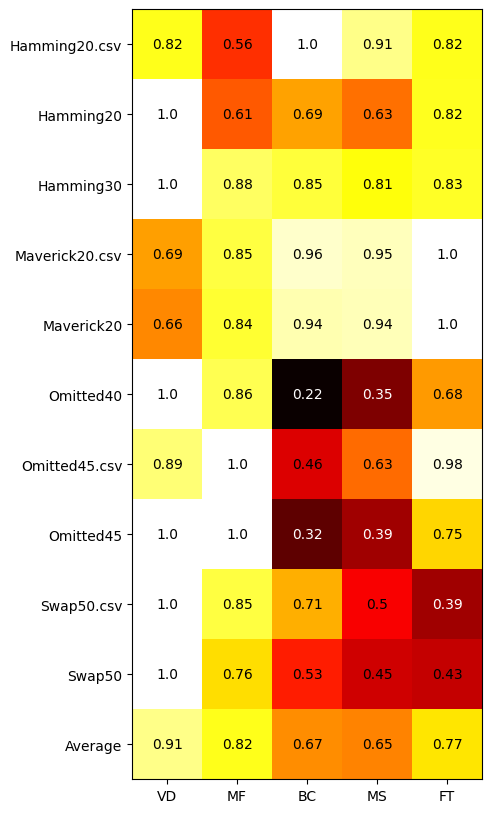

In [19]:
# read all files starting with "synthetic_" in "data/" with pd
dict_models = {}

tab = np.zeros(5)
tabn = 0
for filename in os.listdir("data/"):
    if filename.startswith("synthetic_"):
        model = filename.split("_")[1]
        val = pd.read_csv("data/" + filename, sep=",", index_col=0).values
        res = val.sum(axis=0)/val.shape[0]
        dict_models[model] = res/res.max()
        tab += res/res.max()
        tabn += 1

tab = tab/tabn
dict_models["Average"] = tab


        


# plot heatmap
        
fig, ax = plt.subplots(figsize=(10,10))

im = ax.imshow(np.array(list(dict_models.values())), cmap="hot", interpolation="nearest")
ax.set_yticks(np.arange(len(dict_models)))
ax.set_yticklabels(list(dict_models.keys()))
ax.set_xticks(np.arange(5))
ax.set_xticklabels(["VD", "MF", "BC", "MS", "FT"])
# write values in heatmap
for i in range(len(dict_models)):
    for j in range(5):
        text = ax.text(j, i, round(list(dict_models.values())[i][j], 2),
                        ha="center", va="center", color="w" if list(dict_models.values())[i][j] <0.4 else "black")

plt.show()



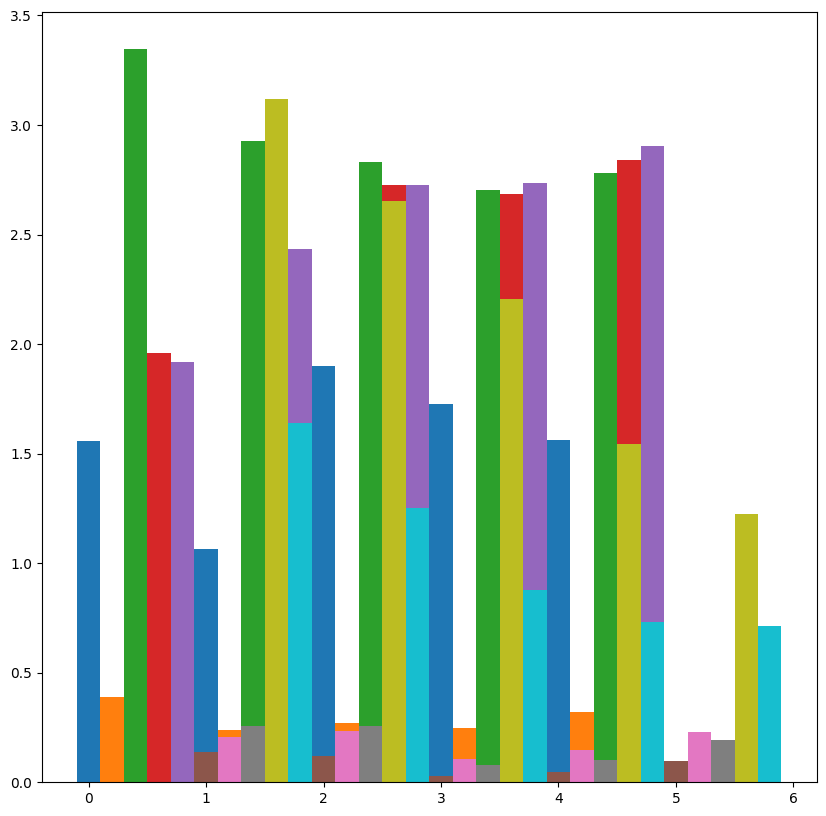

In [15]:
# now bar chart

fig, ax = plt.subplots(figsize=(10,10))

for i in range(len(dict_models)):
    ax.bar(np.arange(5)+i*0.2, list(dict_models.values())[i], width=0.2, label=list(dict_models.keys())[i])